# 1 Gradient Descent Methods

## 1.1 A simple quadratic function: $f(x)=x^{2}_{1}+x^{2}_{2}$

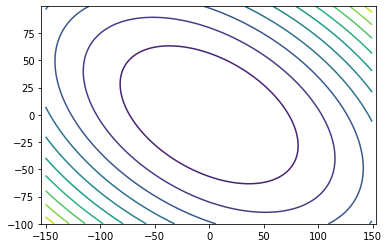

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import math as math
import matplotlib.pyplot as plt 

# The angle
angle = 30*math.pi/180

# The rotation matrix
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]]) 

# The eigenvalues
lamb = np.array([[3,0],[0,1]]) 

# The hessian matrix 
H = np.matmul(rot, np.matmul(lamb, rot.transpose()))

# We now compute the quadratic form
x = np.arange(-150,150,0.5)
y = np.arange(-100,100,0.5)

size_x = np.size(x)
size_y = np.size(y)
Z = np.zeros((size_y,size_x))

for i in np.arange(size_y):
    for j in np.arange(size_x):
        value_x = x[j]
        value_y = y[i]
        Z[i,j] = np.matmul(np.array([value_y, value_x]),np.matmul(H, np.array([[value_y], [value_x]])))

X, Y = np.meshgrid(x, y)
        
plt.axis([-150,150,-100,100])
plt.axis('equal')
plt.contour(X,Y,Z,10)
plt.show()

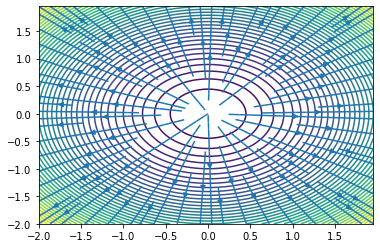

In [2]:
# This is for Linux KDE. Uncomment if you prefer not to use notebook
#import matplotlib
#matplotlib.use('Qt5Agg')

# This is for python notebook.
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

# Compute gradient 
gradx = 2 * X
grady = 2 * Y 

plt.streamplot(X, Y, gradx, grady)

plt.show()

### Simple gradient descent

In [3]:
# Initial value
x = 1
y = -0.7
k = 10
# With alpha=0.1, it converges to the minimum. With alpha>=1 it does not work, as the jumps are too long.
alpha = 0.1
x_list = []
y_list = []

for i in range(k):
    # Compute gradient 
    dx = 2 * x
    dy = 2 * y 
    
    x_list.append(x)
    y_list.append(y)
    
    x = x - alpha*dx
    y = y - alpha*dy
    
x, y

(0.10737418240000003, -0.07516192767999999)

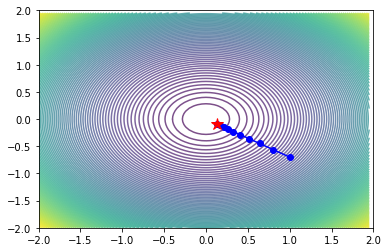

In [5]:
plt.figure()
ax = plt.gca()
ax.axis(xmin=-2, xmax=2)
ax.axis(ymin=-2, ymax=2)

cs = plt.contour(X, Y, Z, 100, alpha=0.7)

line = plt.plot(x_list, y_list, marker='o', color='b')
last = plt.plot(x_list[-1], y_list[-1], marker='*', markersize=12, color='r')

plt.show()

## 1. 2 A more complex function (func2)

$$ f(x_{1},x_{2})=x^{2}_{1}(4-2.1x^{2}_{1}+\frac{1}{3}x^{4}_{1})+x_{1}x_{2}+x^{2}_{2}(-4+4x^{2}_{2}) $$

In [6]:
# Function to analyze
def func2(x,y):
    return x**2*(4-2.1*x**2 + (1/3)*x**4) + x*y+y**2*(-4+4*y**2)

# Gradient of the function
def gradient_func2(x,y):
    dx = y + 2*x*(4-2.1*x**2 + (1/3)*x**4) - 4.2*x**3 + (4*x**5)/3
    dy = x + 2*y*(4*y**2 - 4) + 8*y**3
    return dx, dy


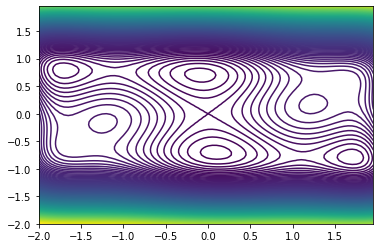

In [7]:
# Contour plot en 2D
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
x, y = np.meshgrid(X, Y)
Z = func2(x,y)
plt.figure()
plt.contour(X, Y, Z, 200)

### 1.2.1. Simple gradient descent

In [8]:
# Initial value
x=1
y=1

x_list = []
y_list = []

k=50 # Number of iterations
alpha=0.1

for iter in range(k):
    # Compute gradient 
    dx, dy = gradient_func2(x,y)
    
    x_list.append(x)
    y_list.append(y)
    
    x = x - alpha*dx
    y = y - alpha*dy
    
print(x, y)

-0.08984201312901925 0.7126564027711556


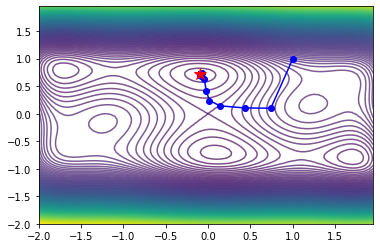

In [9]:
plt.figure()
ax = plt.gca()

cs = plt.contour(X, Y, Z, 200, alpha=0.7)
line = plt.plot(x_list, y_list, marker='o', color='b')
last = plt.plot(x_list[-1], y_list[-1], marker='*', markersize=12, color='r')


plt.show()

### 1.2.2. Backtracking algorithm

Try different step values until the value of f decreases.

In [10]:
def minimize_backtracking_descent(x_initial, y_initial, func, grad_func, convergence_criterion=0.001):
    ''' Find a minimum of funcion "func" using backtracking gradient descent '''

    
    # Initial value
    x_new = x_initial
    y_new = y_initial
    F_new = func(x_new, y_new)

    x_list = []
    y_list = []
    
    # Iterate until end condition is met or we reach 5000 iterations (to prevent infinite loops)
    for num_iter in range(5000):
        x = x_new
        y = y_new
        F = F_new
        
        # append (x,y) values to list for plotting
        x_list.append(x)
        y_list.append(y)

        # Compute gradient 
        dx, dy = grad_func(x,y)

        alpha=1
        # Inner loop to choose an alpha value, maximum 20 iterations (alpha will be divided by 2**40, approx. 1e12)
        for j in range(80):
            x_new = x - alpha*dx
            y_new = y - alpha*dy
            F_new = func(x_new, y_new)
            # print('num_iter={} alpha={} F={}, F_new={}, x_new={}, y_new={}'.format(num_iter, alpha, F, F_new, x_new, y_new))
            # Repeat until reducing alpha makes F decrease
            if F_new<F:
                break
            alpha = alpha/2
        # End of inner loop
        
        # Repeat until the change in F is less than a defined threshold
        if abs(F-F_new) < convergence_criterion:
            break
    # End of outer loop
    
    return x_new, y_new, num_iter, x_list, y_list


### Use backtracking descent on func2

In [11]:
import pandas as pd

starting_points = [[-2,-1], [2,-1], [2,1], [-2,1], [0,1], [0,-1], [-2,0], [2,0], [0,0.1], [-1.5, -0.5], [-1.6, -0.55]]

# Dataframe to store results
backtracking_descent_results = pd.DataFrame(columns=['start', 'end', 'iterations'])

# Repeat for every starting point
for x_initial, y_initial in starting_points:
    x_final, y_final, num_iter, x_list, y_list = minimize_backtracking_descent(x_initial=x_initial, y_initial=y_initial,
                                                               func=func2, grad_func=gradient_func2)
    # Store results
    backtracking_descent_results = backtracking_descent_results.append(
        {'start': [x_initial, y_initial], 'end': [x_final, y_final], 'iterations': num_iter,}, ignore_index=True)
    
    
backtracking_descent_results

,start,end,iterations
0,"[-2, -1]","[-0.08830433042821685, 0.7125692435410022]",5
1,"[2, -1]","[0.09151359652222144, -0.712872728606462]",6
2,"[2, 1]","[0.08830433042821685, -0.7125692435410022]",5
3,"[-2, 1]","[-0.09151359652222144, 0.712872728606462]",6
4,"[0, 1]","[-0.0886949713637426, 0.7186161140259569]",3
5,"[0, -1]","[0.0886949713637426, -0.7186161140259569]",3
6,"[-2, 0]","[-0.0885654378469342, 0.7211578781732273]",8
7,"[2, 0]","[0.0885654378469342, -0.7211578781732273]",8
8,"[0, 0.1]","[-0.08887620057441914, 0.712649839987261]",4
9,"[-1.5, -0.5]","[-0.08915355284019993, 0.7174087943632861]",6


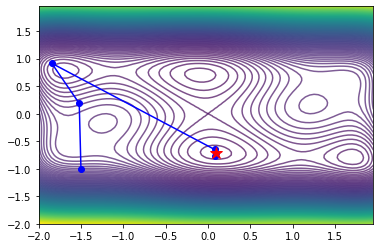

In [13]:
plt.figure()
ax = plt.gca()

x_final, y_final, num_iter, x_list, y_list = minimize_backtracking_descent(x_initial=-1.5, y_initial=-1,
                                                               func=func2, grad_func=gradient_func2)

cs = plt.contour(X, Y, Z, 200, alpha=0.7)
line = plt.plot(x_list, y_list, marker='o', color='b')
last = plt.plot(x_list[-1], y_list[-1], marker='*', markersize=12, color='r')


plt.show()

**Conclusion:** We see that the number of iterations required are less than using a constant step.  
Besides, we avoid the risk of choosing a constant alpha that is too large and does not converge.

### 1.3. Rosenbrock function (func3)

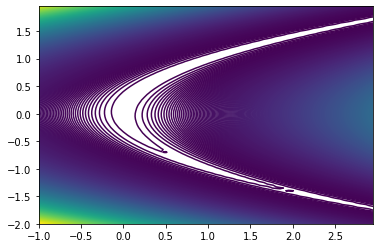

In [63]:
# Function to analyze
a = 1
b = 100
def func3(x,y):
    return (a - x)**2 + b*(y - x**2)**2

# Gradient of the function
def gradient_func3(x,y):
    dx = -2*(a-x) - 4*b*x*(y-x**2)
    dy = 2*b*(y-x**2)
    return dx, dy

# Contour plot en 2D
X = np.arange(-1, 3, 0.05)
Y = np.arange(-2, 2, 0.05)
y, x = np.meshgrid(X, Y)
Z = func3(x, y)
plt.figure()
plt.contour(X, Y, Z, 1000)

In [64]:
import pandas as pd

starting_points = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2] ]

# Dataframe to store results
min_results = pd.DataFrame(columns=['start', 'end', 'iterations'])

# Repeat for every starting point
for x_initial, y_initial in starting_points:
    
    x_final, y_final, num_iter,x_list, y_list = minimize_backtracking_descent(
        x_initial=x_initial, y_initial=y_initial, func=func3, grad_func=gradient_func3)
            
    # Store results
    min_results = min_results.append({'start': [x_initial, y_initial], 'end': [x_final, y_final], 'iterations': num_iter,}, ignore_index=True)

    
min_results

,start,end,iterations
0,"[0, 0]","[0.4169155644404616, 0.18022413047919544]",21
1,"[0, 1]","[0.4512917617945735, 0.21119439445312368]",45
2,"[0, 2]","[0.42154589347924926, 0.18604821845770955]",41
3,"[1, 0]","[0.45795677002330637, 0.19662429904592527]",18
4,"[1, 1]","[1.0, 1.0]",0
5,"[1, 2]","[1.3469829580256565, 1.8172318326327517]",9
6,"[2, 0]","[1.195127749149052, 1.429429461756586]",10
7,"[2, 1]","[1.0434009320455657, 1.0892519924844952]",13
8,"[2, 2]","[-1.5881118800936516, 2.5375871221963124]",4


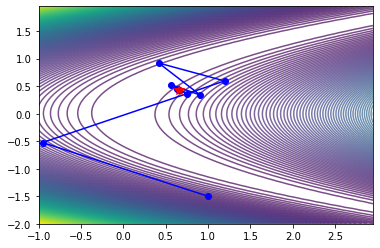

In [65]:
plt.figure()
ax = plt.gca()

_,_,_, x_list, y_list = minimize_backtracking_descent(x_initial=1, y_initial=-1.5,
                                                               func=func3, grad_func=gradient_func3)

cs = plt.contour(X, Y, Z, 200, alpha=0.7)
line = plt.plot(x_list, y_list, marker='o', color='b')
last = plt.plot(x_list[-1], y_list[-1], marker='*', markersize=10, color='r')


plt.show()

#### We now try with an extremely small convergence criterion

In [67]:
import pandas as pd

# Dataframe to store results
min_results = pd.DataFrame(columns=['start', 'end', 'iterations'])

# Repeat for every starting point
for x_initial, y_initial in starting_points:
    
    x_final, y_final, num_iter, x_list, y_list = minimize_backtracking_descent(
        x_initial=x_initial, y_initial=y_initial, func=func3, grad_func=gradient_func3, convergence_criterion=1e-9)
            
    # Store results
    min_results = min_results.append({'start': [x_initial, y_initial], 'end': [x_final, y_final], 'iterations': num_iter,}, ignore_index=True)

    
min_results

,start,end,iterations
0,"[0, 0]","[0.9865292363513661, 0.9732669073699974]",2865
1,"[0, 1]","[0.9828752468893909, 0.9658701925922484]",2592
2,"[0, 2]","[0.9816098127930091, 0.9633712378730986]",2516
3,"[1, 0]","[0.987466064404672, 0.9749627733241263]",2940
4,"[1, 1]","[1.0, 1.0]",0
5,"[1, 2]","[1.1488746592309216, 1.3197352867313983]",1760
6,"[2, 0]","[1.007217169540472, 1.0145579650072594]",2172
7,"[2, 1]","[1.0081867012774108, 1.0165214641770342]",885
8,"[2, 2]","[1.0809740403483992, 1.1688687969617217]",4999


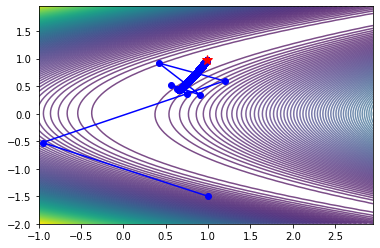

In [68]:
plt.figure()
ax = plt.gca()

x_final, y_final, num_iter, x_list, y_list = minimize_backtracking_descent(x_initial=1, y_initial=-1.5,
                                                               func=func3, grad_func=gradient_func3, convergence_criterion=1e-9)

cs = plt.contour(X, Y, Z, 200, alpha=0.7)
line = plt.plot(x_list, y_list, marker='o', color='b')
last = plt.plot(x_list[-1], y_list[-1], marker='*', markersize=10, color='r')

plt.show()

The minimum is known to be (1,1)  
**Conclusion:** For the Rosenbrock function, the gradient descent approach does **not** work well. It is not able to find the minimum in a reasonable number of iterations.  
The reason is that the direction of the gradient is not helpful to get closer to the minimum in this case.

# 2 Newton Descent Method

## 2.1 A simple quadratic function (func4)
$$f(x_{1},x_{2}) =100x_{1}^{2}+x_{2}^{2}$$

In [69]:
def func4(x,y):
    return 100*x**2 + y**2

def gradient_func4(x,y):
    dx = 200*x
    dy = 2*y
    return dx, dy

### 2.1.1 Minimize using gradient descent

In [70]:
starting_points = [[0,-2], [0,2], [-2,0], [2,0], [-2,-2], [2,2]]

# Dataframe to store results
min_results = pd.DataFrame(columns=['start', 'end', 'iterations'])

# Repeat for every starting point
for x_initial, y_initial in starting_points:
    
    x_final, y_final, num_iter, x_list, y_list = minimize_backtracking_descent(
        x_initial=x_initial, y_initial=y_initial, func=func4, grad_func=gradient_func4)
            
    # Store results
    min_results = min_results.append({'start': [x_initial, y_initial], 'end': [x_final, y_final], 'iterations': num_iter,}, ignore_index=True)

    
min_results

,start,end,iterations
0,"[0, -2]","[0.0, 0.0]",1
1,"[0, 2]","[0.0, 0.0]",1
2,"[-2, 0]","[-0.0020067825551066676, 0.0]",11
3,"[2, 0]","[0.0020067825551066676, 0.0]",11
4,"[-2, -2]","[-0.018831856356790744, -0.6506562126920202]",51
5,"[2, 2]","[0.018831856356790744, 0.6506562126920202]",51


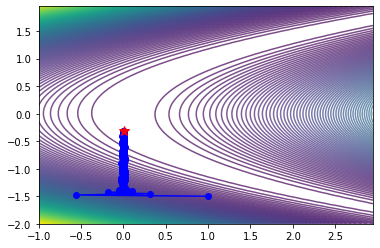

In [71]:
plt.figure()
ax = plt.gca()

x_final, y_final, num_iter, x_list, y_list = minimize_backtracking_descent(x_initial=1, y_initial=-1.5,
                                                               func=func4, grad_func=gradient_func4)

cs = plt.contour(X, Y, Z, 200, alpha=0.7)
line = plt.plot(x_list, y_list, marker='o', color='b')
last = plt.plot(x_list[-1], y_list[-1], marker='*', markersize=10, color='r')


plt.show()

The gradient descent algorythm has **difficulties to converge** from some starting points.

#### 2.1.2 Minimize the previous function using the Newton method

In [72]:
# Initial value
x_new=1
y_new=-1.5
F_new = func4(x_new, y_new)
iter=1

x_list=[]
y_list=[]

while iter==1 or abs(F-F_new) > 0.001:
    x = x_new
    y = y_new
    F = F_new
    
    x_list.append(x)
    y_list.append(y)
    
    # Compute gradient 
    gradient = np.array(gradient_func4(x,y))
    
    # Compute the d vector from Newton´s method 
    hessian = np.array([[200,0], [0,2]])
    dx, dy = np.linalg.solve(hessian, gradient)
    
    
    dx = -x
    dy = -y

    alpha=1
    x_new = x + alpha*dx
    y_new = y + alpha*dy
    F_new = func4(x_new, y_new)
    print('iter={} alpha={} F={}, F_new={}, x_new={}, y_new={}'.format(iter,alpha,F,F_new,x_new,y_new))
    
    while F_new>F:
        alpha = alpha/2
        x_new = x - alpha*dx
        y_new = y - alpha*dy
        F_new = func4(x_new, y_new)
        print('iter={} alpha={} F={}, F_new={}, x_new={}, y_new={}'.format(iter,alpha,F,F_new,x_new,y_new))
    iter+=1
x, y

iter=1 alpha=1 F=102.25, F_new=0.0, x_new=0, y_new=0.0
iter=2 alpha=1 F=0.0, F_new=0.0, x_new=0, y_new=0.0


(0, 0.0)

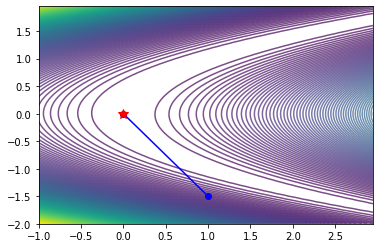

In [73]:
plt.figure()
ax = plt.gca()

cs = plt.contour(X, Y, Z, 200, alpha=0.7)
line = plt.plot(x_list, y_list, marker='o', color='b')
last = plt.plot(x_list[-1], y_list[-1], marker='*', markersize=10, color='r')

plt.show()

**Conclusion:** The Newton method arrives to the solution in one single step. This is because it is a degree 2 polynomial function, and Newton works by using a degree 2 approximation, which in this case is exact.

#### 2.1.3 Compare the number of iterations to reach the minimim, plot path of each method

## PENDING

## 2.2 A more complex function (func2)

### 2.2.2 Perform Newton descent when Hessian is positive definite at iter=k, otherwise use gradient descent (apply backtracking for $a^{k}$)

In [128]:
from numpy import linalg as LA

def hessian_func2(x,y):
    d2x = 2*(4 - 2.1*x**2 + (x**4)/3) - 8.4*x**2 + 8/3*x**4 - 3*4.2*x**2 + 20/3*x**4
    d2y = 2*(4*y**2 - 4) + 16*y**2 + 24*y**2
    H = [[d2x, 1], [1, d2y]]
    return H

In [139]:
starting_points = [[-2,-1], [2,-1], [2,1], [-2,1], [0,1], [0,-1], [-2,0], [2,0], [0,0.1], [-1.5, -0.5], [-1.6, -0.55]]

Newton_results = pd.DataFrame(columns=['start', 'end', 'iterations', 'newton_iterations', 'gradient_descent_iterations'])
for x_initial,y_initial in starting_points:

    x_new=x_initial
    y_new=y_initial
    iter=0
    newton=0
    GD=0
    F_new = func2(x_new, y_new)
    
    while iter==1 or abs(F-F_new) > 0.001:
        x = x_new
        y = y_new
        F = F_new

        # Compute gradient 
        gradient = gradient_func2(x_new, y_new)
        # Compute the d vector from Newton´s method 
        hessian = hessian_func2(x_new, y_new)
        eigs = LA.eigvals(hessian)

        if all(eigs>0):
            #print('using newton method: ' + str(iter))
            dx, dy = LA.solve(hessian, gradient)
            newton+=1
        else:
            #print('use gradient descent: ' + str(iter))
            dx, dy = gradient
            GD+=1

        alpha=1
        x_new = x - alpha*dx
        y_new = y - alpha*dy
        #print('dx= {} dy={}'.format(dx, dy))
        F_new = func2(x_new, y_new)
        #print('iter={} alpha={} F={}, F_new={}, x_new={}, y_new={}'.format(iter,alpha,F,F_new,x_new,y_new))

        while F_new>F:
            alpha = alpha/2
            x_new = x - alpha*dx
            y_new = y - alpha*dy
            F_new = func2(x_new, y_new)
            #print('iter={} alpha={} F={}, F_new={}, x_new={}, y_new={}'.format(iter,alpha,F,F_new,x_new,y_new))
        iter+=1

    Newton_results = Newton_results.append({'start': [x_initial, y_initial], 'end': [x_new, y_new], 'iterations': iter,
                                'newton_iterations': newton, 'gradient_descent_iterations': GD}, ignore_index=True)


In [140]:
Newton_results

,start,end,iterations,newton_iterations,gradient_descent_iterations
0,"[-2, -1]","[-1.607107651396645, -0.5686510918812527]",5,5,0
1,"[2, -1]","[1.7036190849344697, -0.7960841483593883]",4,4,0
2,"[2, 1]","[1.607107651396645, 0.5686510918812527]",5,5,0
3,"[-2, 1]","[-1.7036190849344697, 0.7960841483593883]",4,4,0
4,"[0, 1]","[-0.0898420452644923, 0.7126566581455768]",4,4,0
5,"[0, -1]","[0.0898420452644923, -0.7126566581455768]",4,4,0
6,"[-2, 0]","[0.08984253225030008, -0.7126605220676953]",8,3,5
7,"[2, 0]","[-0.08984253225030008, 0.7126605220676953]",8,3,5
8,"[0, 0.1]","[-0.0898442703612588, 0.712674307166547]",4,3,1
9,"[-1.5, -0.5]","[-1.6073909075501838, -0.5689033106424544]",3,3,0


In [134]:
# Compare with the backtracking descent results calculated in 1.2
backtracking_descent_results

,start,end,iterations
0,"[-2, -1]","[-0.08830433042821685, 0.7125692435410022]",5
1,"[2, -1]","[0.09151359652222144, -0.712872728606462]",6
2,"[2, 1]","[0.08830433042821685, -0.7125692435410022]",5
3,"[-2, 1]","[-0.09151359652222144, 0.712872728606462]",6
4,"[0, 1]","[-0.0886949713637426, 0.7186161140259569]",3
5,"[0, -1]","[0.0886949713637426, -0.7186161140259569]",3
6,"[-2, 0]","[-0.0885654378469342, 0.7211578781732273]",8
7,"[2, 0]","[0.0885654378469342, -0.7211578781732273]",8
8,"[0, 0.1]","[-0.08887620057441914, 0.712649839987261]",4
9,"[-1.5, -0.5]","[-0.08915355284019993, 0.7174087943632861]",6


#### 2.2.3

### PENDING